<div>
    <table>
        <tr>
            <td>
                    <h1>Brightway2 seminar</h1>
                    Chris Mutel <a href="https://www.psi.ch/">(PSI)</a>
                    Pascal Lesage <a href="http://www.ciraig.org/en/">(CIRAIG)</a>
            </td>
        </tr>
    </div>

# Brightway modules: bw2io, bw2data, bw2calc

*The following content is taken and adapted from [the course materials dispensed at the 2022 Brightcon conference](https://github.com/Depart-de-Sentier/teaching-material/tree/main/beginners/Projects%2C%20databases%2C%20exchanges%2C%20activities). If you need additional notebooks, go to this repository*.


<div class="alert alert-info">
Note: we will be using Brightway2, not Brightway25. From the user end side, very little differ between the two.
</div>





**Brightway2 documentation** 👉 [https://docs.brightway.dev/en/legacy/index.html](https://docs.brightway.dev/en/legacy/index.html)

**Brightway25 documentation** 👉 [https://docs.brightway.dev/en/latest/index.html](https://docs.brightway.dev/en/latest/index.html)

### Learning objectives  
  - Learn about the general structure of Brightway and its most importand abstractions: projects, databases, activities and exchanges  
  - Learn how to find objects (notably activities and exchanges), assign them to variables and work with them using their associated methods  
  - Learn about how simple LCA calculations are done (one product, one impact category), and specifically how the different matrices are built and used  
  - Learn how to extract information from the matrices (inputs or results) and translate them into nice, human-readable objects  
  - Learn different ways to carry out comparative LCAs  
  - Learn different ways to carry out LCAs with multiple impact categories

### Content  

#### 1) Getting started  
##### 1.1) Jupyter lab / notebooks and Brightway2  
  - A quick tour of jupyter lab / notebooks  
  - Accessing Brightway2 libraries  
  
##### 1.2) Projects  
  - Concept  
  - Creating a new project, or switching to an existing project  
  - Contents of a project  

  
##### 1.3) bw2_setup(), biosphere3 database and LCIA methods  
  - bw2_setup()  
  - biosphere3 database and a first look at database objects  
  - Getting activities from codes or keys  
  - Methods  
  - Looking up elementary flows (list comprehensions, search)  
  - Searching for methods  
  - Nice display of data in methods 

##### 1.4) LCI databases  
  - Importing (succinct)  
  - LCI activities  
  - Looking up activities  
  - LCI exchanges
  - Loaded LCI databases
  
#### 2) My first LCA - simplest case:  
##### 2.1) General syntax of LCA calculations  

##### 2.2) The `demand` attribute  

##### 2.3) Reminder of the system that needs to be solved in calculating an LCI  

##### 2.4) Building the matrices  

  - $A$ matrix  
  - $B$ matrix  
  - $f$ (demand array)  
  
##### 2.5) Solution to the inventory calculation  

  - Supply array  
  - Inventory matrix  
  
##### 2.6) Life Cycle Impact Assessment  

  - `.lcia()` method  
  - Simple contribution analysis  
  
#### 3) My second LCA - comparative LCA:
    
#### 4) My third LCA - Multiple impact categories
  
#### 5) My first and third LCAs revisited with MultiLCA

### 1) Getting started

#### 1.1) Jupyter lab / notebooks and accessing Brightway2

This teaching material was produced with the intention to be used in Jupyter Notebooks.

For installation instructions, consult the [brightway documentation](https://docs.brightway.dev/en/legacy/content/installation/installation.html)

<div class="alert alert-info">
This notebook is meant to run with a specific conda (and python) environment.
    Make sure you have started Jupyter Notebooks or Jupyter Lab from the conda
    environment where the brightway2 modules are installed.
</div>

##### Accessing Brightway2 libraries

The different modules in Brightway2 are Python libraries. This means that, to use them, you can use any environment from which you normally use Python (Idle, command prompt, Spyder or, as is the case today, Jupyter Notebooks).  

We will favour Jupyter Notebooks in this course because it allows us to integrate code and text. It will also allow us to provide code snippets for you to complete.  

Like all other Python packages, you need to `import` Brightway2 modules. We will here import it as `bw`. This means that, to access a **method** or **function** from the brightway2 modules, the prefix `bw.` needs to be added. 

In [1]:
import brightway2 as bw

Alternatively, we can import the Brightway's sub-modules directly:

In [2]:
import bw2io, bw2data, bw2calc

We're also going to be using the following libraries:

In [3]:
import os               # to use "operating system dependent functionality"
import numpy as np      # "the fundamental package for scientific computing with Python"
import pandas as pd     # "high-performance, easy-to-use data structures and data analysis tools" for Python

#### 1.2) Projects

##### Concept

The top-level containent in Brightway2 is the project (see [here](https://2.docs.brightway.dev/intro.html#projects) for a description and [here](https://2.docs.brightway.dev/technical/bw2data.html#projects) for the **technical docs about projects**). A project contains LCI databases, LCIA methods and other less often used objects. Objects from one project do not interract with objects within other projects. By analogy, projects are like databases in other LCA software.  
When you first launch Brightway2, you will be in the `default` project. You can check this using the `current` property of the `projects` object: 

In [4]:
bw.projects.current

'default'

##### Creating a new project, or switching to an existing project

Let's create a new project for this seminar, unsurprisingly called "bw2_seminar_2017". There are two ways of doing this:  
* `projects.create_project('brightcon22')` will create the project, but you will remain in your current project.
* `projects.set_current('brightcon22')` will switch you to the project passed as argument, and create it first if it doesn't exist.  Let's do the latter:

In [4]:
# The name of the project is entered as string; 
# it doesn't really have any restrictions, so can include spaces, 
# special characters, other languages, or even emoji.

bw.projects.set_current('coursePSI') 

You can always see what projects you have on your computer by running `list(bw.projects)`. Unless you have worked with Brightway2 before on your computer, your list should contain two projects: 'default' and 'bw2_seminar_2017'.

_**Exercise**_: list the projects on your computer.

In [5]:
list(bw.projects)

[Project: default,
 Project: new,
 Project: new4,
 Project: bw25,
 Project: polyviz,
 Project: uvek,
 Project: test,
 Project: ei38,
 Project: arezoo,
 Project: strat_metals,
 Project: testbio,
 Project: testbio2,
 Project: testbio3,
 Project: psi1,
 Project: ei39]

Like in all Python modules, you can get additionnal information on the `projects` object and associated properties and methods by typing `help(projects)`. The [docs](https://docs.brightwaylca.org/technical/bw2data.html#projects) are of course more verbose.

##### Contents of a project

One property of `projects` is its location, given by `projects.dir`:

In [6]:
bw.projects.dir

'/Users/romain/Library/Application Support/Brightway3/coursePSI.ad34cb91313c17c13fa891538321d355'

<div class="alert alert-info">
    Try to locate your project directory on your computer.
</div>

First things first: **do not panic**! You can use Brightway2 for years without ever opening this directory, but we will discuss some of these files later.

It is simply interesting to note that, for now, all the directories are empty except the `lci` directory, which contains an empty database.

All in all, the project takes up about 150KB.  
Its now time to start populating the project.

#### 1.3) bw2setup(), biosphere3 database and LCIA methods

##### bw2setup()

The first thing you should do is add flow and LCIA methods. This is done by running the `bw2setup` function:

In [7]:
bw.bw2setup()

Writing activities to SQLite3 database:


Creating default biosphere

Applying strategy: normalize_units
Applying strategy: drop_unspecified_subcategories
Applying strategy: ensure_categories_are_tuples
Applied 3 strategies in 0.00 seconds


0% [##############################] 100% | ETA: 00:00:00
Total time elapsed: 00:00:00


Title: Writing activities to SQLite3 database:
  Started: 03/17/2024 18:25:52
  Finished: 03/17/2024 18:25:52
  Total time elapsed: 00:00:00
  CPU %: 78.30
  Memory %: 1.47
Created database: biosphere3
Creating default LCIA methods

Wrote 762 LCIA methods with 227223 characterization factors
Creating core data migrations



The output tells us that bw2_setup created some very useful things:  
  - Created a database called "biosphere3": this database contains elementary flows (called biosphere exchanges in Brightway2)  
  - **762** impact assessment methods  (with bw2data version 3.6.6)

<div class="alert alert-info">
    Note: The biosphere database contains all "natural" flows human-made activities connect to. E.g., CO2 emissions, ore in ground, etc.
</div>
  
It also created some a `mapping` between the imported exchanges and some integer: more on this later.  
The whole directory now takes up 157MB.

##### biosphere3 database and a first look at database objects

<div class="alert alert-info">
    Note: You can always list the databases inside a project by simply typing 'bw.databases'. This accesses the 'database.json' file in your 'project.dir' (I learned the latter by typing `databases?`, you should try it too.)
</div>



In [8]:
bw.databases

Databases dictionary with 1 object(s):
	biosphere3

While not impossible to interact with the data at this level, you probably never will unless you are developping some funky program. Instead, it is strongly recommended to learn to work with `abstractions`.  

To access a database in Brightway, you use the `Database` initialization method (again, you can type `Database?` for more information - this is the last time I'll mention this.

In [9]:
bw.Database('biosphere3')

Brightway2 SQLiteBackend: biosphere3

It doesn't actually return anything other than information about the Backend.  
However, there are many properties and functions associated with this database object.  These are found [here](https://2.docs.brightway.dev/technical/bw2data.html#databasechooser). We can also have a look through the autocomplete. Let's assign the database to a variable:

In [10]:
my_bio = bw.Database('biosphere3')

Let's check the my_bio `type`:

In [11]:
type(my_bio)

bw2data.backends.peewee.database.SQLiteBackend

Let's check its length:

In [12]:
len(my_bio)

4709

This is exactly the number of items we saw had been added to databases.db  
Given this, what do you think is going on?

If you type `my_bio.` and click on tab, you should get a list of properties and methods associated with database objects. Try this now:

In [ ]:
my_bio.get        # Type my_bio. and click tab. Have a look at the different properties and objects

Some of the more basic ones we will be using now are :  
  - `random()` - returns a random activity in the database
  - `get(*valid_exchange_tuple*)` - returns an activity, but you must know the activity key
  - `load()` - loads the whole database as a dictionary.
  - `make_searchable` - allows searching of the database (by default, it is already searchable)
  - `search` - search the database  
  
Lets start with `random`:

In [13]:
my_bio.random()

'Carbon monoxide, non-fossil' (kilogram, None, ('air', 'urban air close to ground'))

This returns a biosphere activity, but without assigning it to a variable, there is not much we can do with it directly.  

Note: It may seem counter-intuitive for elementary *flows* to be considered *activities* in Brightway, but it is no mistake. 
LCA models are made up of **nodes** (activities) that are linked by **edges** (exchanges). The biosphere activities are the nodes *outside* the technosphere. Emissions and resource extractions are modelled as exchanges between activities in the technosphere (part of the product system) and these biosphere activities.  

More on this later. 

For now, let's assign another random activity to a variable:

In [14]:
random_biosphere = my_bio.random()
random_biosphere

'Carbonate' (kilogram, None, ('water', 'ground-'))

We can get the type of the object that was returned from the database:

In [15]:
type(random_biosphere)

bw2data.backends.peewee.proxies.Activity

The type is an **activity proxy**. Activity proxies allow us to interact with the content of the database.

In Brightway, we *almost* always work with `Activity` or `Exchange` objects. 

To see what the activity contains, we can convert it to a dictionary:

In [16]:
random_biosphere.as_dict()

{'categories': ('water', 'ground-'),
 'code': 'a4403b63-270d-4995-a249-8e31763ce5d7',
 'CAS number': '003812-32-6',
 'name': 'Carbonate',
 'database': 'biosphere3',
 'unit': 'kilogram',
 'type': 'emission'}

##### Getting activities from codes or keys

We can see that the activities in the biosphere3 database have unique **codes**, which we can use with the `get` function:

In [17]:
my_bio.get(random_biosphere['code'])

'Carbonate' (kilogram, None, ('water', 'ground-'))

Activities can also be "gotten" via `get_activity`, but the argument is the activity **key**, consisting of a tuple with two elements: the database name, and the activity code.

**Exercise:** Use `bw.get_activity()` to retrieve the random biosphere activity. 

In [18]:
database_name = 'biosphere3'
code = random_biosphere['code']
random_biosphere_key = (database_name, code)
random_biosphere_key

('biosphere3', 'a4403b63-270d-4995-a249-8e31763ce5d7')

In [19]:
bw.get_activity(random_biosphere_key)

'Carbonate' (kilogram, None, ('water', 'ground-'))

You can always find (or return) the key to an activity using the `.key` property.

In [20]:
random_biosphere.key

('biosphere3', 'a4403b63-270d-4995-a249-8e31763ce5d7')

##### Searching for activities

Let's say we are looking for a specific elementary flow, we can use the `search` method of the database (see [here](https://docs.brightwaylca.org/technical/bw2data.html#default-backend-databases-stored-in-a-sqlite-database) for more details on using search):

In [21]:
bw.Database('biosphere3').search('carbon dioxide')

['Carbon dioxide, fossil' (kilogram, None, ('air', 'urban air close to ground')),
 'Carbon dioxide, fossil' (kilogram, None, ('air', 'non-urban air or from high stacks')),
 'Carbon dioxide, in air' (kilogram, None, ('natural resource', 'in air')),
 'Carbon dioxide, fossil' (kilogram, None, ('air',)),
 'Carbon dioxide, fossil' (kilogram, None, ('air', 'low population density, long-term')),
 'Carbon dioxide, fossil' (kilogram, None, ('air', 'lower stratosphere + upper troposphere')),
 'Carbon dioxide, non-fossil' (kilogram, None, ('air', 'urban air close to ground')),
 'Carbon dioxide, non-fossil' (kilogram, None, ('air', 'low population density, long-term')),
 'Carbon dioxide, non-fossil' (kilogram, None, ('air', 'non-urban air or from high stacks')),
 'Carbon dioxide, non-fossil' (kilogram, None, ('air',)),
 'Carbon dioxide, non-fossil' (kilogram, None, ('air', 'lower stratosphere + upper troposphere')),
 'Carbon dioxide, from soil or biomass stock' (kilogram, None, ('air', 'lower stra

It is also possible to use "filters" to narrow searches, e.g.

In [22]:
bw.Database('biosphere3').search('carbon dioxide', filter={'categories':'urban', 'name':'fossil'})

Excluding 17 filtered results


['Carbon dioxide, fossil' (kilogram, None, ('air', 'urban air close to ground')),
 'Carbon dioxide, fossil' (kilogram, None, ('air', 'non-urban air or from high stacks')),
 'Carbon dioxide, non-fossil' (kilogram, None, ('air', 'urban air close to ground')),
 'Carbon dioxide, non-fossil' (kilogram, None, ('air', 'non-urban air or from high stacks'))]

The database object is also iterable, allowing "home-made" searches through list comprehensions. This approach is better because one can add as many criteria as wanted:

In [23]:
[act for act in my_bio if 'Carbon dioxide' in act['name'] 
                                            and 'fossil' in act['name']
                                            and 'non' not in act['name']
                                            and 'urban air close to ground' in str(act['categories'])
         ]

['Carbon dioxide, fossil' (kilogram, None, ('air', 'urban air close to ground'))]

Activities returned by searches or list comprehensions can be assigned to variables, but to do so, one needs to identify the activity by index. Based on the above, I can refine my filters to ensure the list comprehension only returns one activity, and then choose it without fear of choosing the wrong one..

In [24]:
[act for act in my_bio if 'Carbon dioxide' in act['name'] 
                                            and 'fossil' in act['name']
                                            and 'non' not in act['name']
                                            and 'urban air close to ground' in str(act['categories'])]

['Carbon dioxide, fossil' (kilogram, None, ('air', 'urban air close to ground'))]

In [25]:
activity_I_want = [act for act in my_bio if 'Carbon dioxide' in act['name'] 
                                            and 'fossil' in act['name']
                                            and 'non' not in act['name']
                                            and 'urban air close to ground' in str(act['categories'])
         ][0]
activity_I_want

'Carbon dioxide, fossil' (kilogram, None, ('air', 'urban air close to ground'))

**Exercise**: look for and assign to a variable an emission of nitrous oxide emitted to air in the "urban air" subcompartment.

In [26]:
# First inquiry:
[act for act in my_bio if 'nitrogen' in act['name']
                       and 'urban air' in str(act['categories'])
         ]

['Dinitrogen monoxide' (kilogram, None, ('air', 'urban air close to ground')),
 'Dinitrogen monoxide' (kilogram, None, ('air', 'non-urban air or from high stacks'))]

In [27]:
# Found what I need:
[act for act in my_bio if 'Dinitrogen monoxide' in act['name']
                       and 'urban air close to ground' in str(act['categories'])
         ][0]

'Dinitrogen monoxide' (kilogram, None, ('air', 'urban air close to ground'))

Let's leave the biosphere database here for now.

##### Methods

bw2_setup() also installed LCIA methods.

In [28]:
bw.methods

Methods dictionary with 762 objects, including:
	('CML v4.8 2016', 'acidification', 'acidification (incl. fate, average Europe total, A&B)')
	('CML v4.8 2016', 'climate change', 'global warming potential (GWP100)')
	('CML v4.8 2016', 'ecotoxicity: freshwater', 'freshwater aquatic ecotoxicity (FAETP inf)')
	('CML v4.8 2016', 'ecotoxicity: marine', 'marine aquatic ecotoxicity (MAETP inf)')
	('CML v4.8 2016', 'ecotoxicity: terrestrial', 'terrestrial ecotoxicity (TETP inf)')
	('CML v4.8 2016', 'energy resources: non-renewable', 'abiotic depletion potential (ADP): fossil fuels')
	('CML v4.8 2016', 'eutrophication', 'eutrophication (fate not incl.)')
	('CML v4.8 2016', 'human toxicity', 'human toxicity (HTP inf)')
	('CML v4.8 2016', 'material resources: metals/minerals', 'abiotic depletion potential (ADP): elements (ultimate reserves)')
	('CML v4.8 2016', 'ozone depletion', 'ozone layer depletion (ODP steady state)')
Use `list(this object)` to get the complete list.

One can load a random method:

In [29]:
bw.methods.random()

('EPS 2020d', 'material resources: metals', 'monetary impact value')

In [30]:
type(bw.methods.random())

tuple

Here, the random method returns the tuple by which the method is identified. To get to an actual method, the following syntax is used:

In [31]:
bw.Method(bw.methods.random())

Brightway2 Method: EDIP 2003 no LT: eutrophication no LT: separate P potential no LT

Of course, a random method is probably not useful except to play around. To find an actual method, one can again use list comprehensions. Let's say I am interested in using the IPCC2013 100 years method:

In [33]:
[m for m in bw.methods if 'IPCC' in str(m) and ('2021') in str(m) and '100' in str(m)]

[('IPCC 2021 no LT',
  'climate change no LT',
  'global temperature change potential (GTP100) no LT'),
 ('IPCC 2021 no LT',
  'climate change no LT',
  'global warming potential (GWP100) no LT'),
 ('IPCC 2021 no LT',
  'climate change: biogenic no LT',
  'global temperature change potential (GTP100) no LT'),
 ('IPCC 2021 no LT',
  'climate change: biogenic no LT',
  'global warming potential (GWP100) no LT'),
 ('IPCC 2021 no LT',
  'climate change: biogenic, including SLCFs no LT',
  'global temperature change potential (GTP100) no LT'),
 ('IPCC 2021 no LT',
  'climate change: biogenic, including SLCFs no LT',
  'global warming potential (GWP100) no LT'),
 ('IPCC 2021 no LT',
  'climate change: fossil no LT',
  'global temperature change potential (GTP100) no LT'),
 ('IPCC 2021 no LT',
  'climate change: fossil no LT',
  'global warming potential (GWP100) no LT'),
 ('IPCC 2021 no LT',
  'climate change: fossil, including SLCFs no LT',
  'global temperature change potential (GTP100) no

I am interested in the second of these, and will assign it to a variable. I can will refine my search until there is one element in my list and then choose it by subscripting.

In [37]:
[m for m in bw.methods if 'IPCC' in m[0]
                        and ('2021') in str(m)
                        and 'GWP100' in str(m)
                        and 'no LT' not in str(m)
                        and 'SLCF' not in str(m)
]

[('IPCC 2021', 'climate change', 'global warming potential (GWP100)'),
 ('IPCC 2021',
  'climate change: biogenic',
  'global warming potential (GWP100)'),
 ('IPCC 2021', 'climate change: fossil', 'global warming potential (GWP100)'),
 ('IPCC 2021',
  'climate change: land use',
  'global warming potential (GWP100)')]

In [39]:
# Good, now let's choose it:
ipcc2021 = [m for m in bw.methods if 'IPCC' in m[0]
                    and ('2021') in str(m)
                    and 'GWP100' in str(m)
                    and 'no LT' not in str(m)
                    and 'SLCF' not in str(m)
           ][0]

Of course, if I know exactly the method I want, and I know the syntax, I can simply type it out: `('IPCC 2021', 'climate change', 'GWP 100a')`

In [40]:
type(ipcc2021)

tuple

In [42]:
ipcc_2021_method = bw.Method(ipcc2021)

In [43]:
type(ipcc_2021_method)

bw2data.method.Method

Again, there are a bunch of methods associated with a method object. You can access these by typing ipcc_2013_method. and clicking tab.  
For example, metadata:

In [44]:
ipcc_2021_method.name

('IPCC 2021', 'climate change', 'global warming potential (GWP100)')

In [45]:
ipcc_2021_method.metadata

{'description': '',
 'filename': 'LCIA_Implementation_3.9.xlsx',
 'unit': 'kg CO2-Eq',
 'abbreviation': 'ipcc-2021cg.7f3bec1f3f63e5211c9815c52a5f928c',
 'num_cfs': 226}

In [46]:
ipcc_2021_method.metadata['unit']

'kg CO2-Eq'

Question: where is this metadata?

Let's use the `load` method to see what is in the object:

In [47]:
ipcc_2021_method.load()

[(('biosphere3', '892f10da-7bf2-42b3-b171-221989661a05'), 0.006),
 (('biosphere3', 'f9749677-9c9f-4678-ab55-c607dfdc2cb9'), 1),
 (('biosphere3', '4cadbc9f-0472-4bb9-a942-df5b90e37878'), 20.6),
 (('biosphere3', '9ea11aea-7cb7-4b38-b936-a42c2a4bac97'), 0.437),
 (('biosphere3', 'fa0c2bee-8dd9-4f8a-8489-b1f3b43de958'), 1530),
 (('biosphere3', '818cee9e-231c-4b53-8ed2-47a0001802d5'), 161),
 (('biosphere3', 'f43b2b80-f5a6-4d31-9980-0754305a978d'), 5810),
 (('biosphere3', '033d3a16-e1a2-4ce8-8769-f4ea867801ca'), 860),
 (('biosphere3', '393d0862-04cc-45ae-8d08-9dc2a4461b35'), 164),
 (('biosphere3', '468bebea-17ee-49d3-b11d-c603d91c67c8'), 1.3),
 (('biosphere3', '400be66e-4383-482a-93e3-c005e96de261'), 2300),
 (('biosphere3', 'db907ff7-6cf0-4f88-9376-116262dfad6d'), 90.4),
 (('biosphere3', '27f61651-96a5-45c7-9873-832626cf6905'), 597),
 (('biosphere3', '15e54d5b-aba2-40a6-9aa8-aa2b8c432129'), 9600),
 (('biosphere3', 'df5dd437-2e12-4af6-8f7a-9c8224857dc5'), 12400),
 (('biosphere3', '5d1701c5-c4e

This contains tuples with (elementary flow, characterization factors).

##### Nice display of data in methods 

**Exercise:** Create a dictionary with keys = elementary flow names and values = characterization factors for the `IPCC GWP100` method (including long-term emissions).

Bonus (optional): Generate a Pandas Series with the resulting dictionary. 

In [51]:
# Generate the dictionary using a comprehension:
GWP_dict = {bw.get_activity(ef[0])['name']:ef[1] for ef in ipcc_2021_method.load()}
GWP_dict

{'Butane': 0.006,
 'Carbon dioxide, fossil': 1,
 'Chloroform': 20.6,
 'Ethane': 0.437,
 'Ethane, 1,1,1,2-tetrafluoro-, HFC-134a': 1530,
 'Ethane, 1,1,1-trichloro-, HCFC-140': 161,
 'Ethane, 1,1,1-trifluoro-, HFC-143a': 5810,
 'Ethane, 1,1-dichloro-1-fluoro-, HCFC-141b': 860,
 'Ethane, 1,1-difluoro-, HFC-152a': 164,
 'Ethane, 1,2-dichloro-': 1.3,
 'Ethane, 1-chloro-1,1-difluoro-, HCFC-142b': 2300,
 'Ethane, 2,2-dichloro-1,1,1-trifluoro-, HCFC-123': 90.4,
 'Ethane, 2-chloro-1,1,1,2-tetrafluoro-, HCFC-124': 597,
 'Ethane, chloropentafluoro-, CFC-115': 9600,
 'Ethane, hexafluoro-, HFC-116': 12400,
 'Ethane, pentafluoro-, HFC-125': 3740,
 'Tetrachloroethylene': 6.34,
 'Trichloroethylene': 0.044,
 'Methane, bromo-, Halon 1001': 2.43,
 'Methane, bromochlorodifluoro-, Halon 1211': 1930,
 'Methane, bromotrifluoro-, Halon 1301': 7200,
 'Methane, chlorodifluoro-, HCFC-22': 1960,
 'Methane, chloro-fluoro-, HCFC-31': 79.4,
 'Methane, chlorotrifluoro-, CFC-13': 16200,
 'Methane, dichloro-, HCC-30': 

In [53]:
# Bonus: put the whole thing in a neat Pandas series
pd.Series(GWP_dict,
          name="{}, {}".format(ipcc_2021_method.name, ipcc_2021_method.metadata['unit']))

Butane                                                    0.006
Carbon dioxide, fossil                                    1.000
Chloroform                                               20.600
Ethane                                                    0.437
Ethane, 1,1,1,2-tetrafluoro-, HFC-134a                 1530.000
Ethane, 1,1,1-trichloro-, HCFC-140                      161.000
Ethane, 1,1,1-trifluoro-, HFC-143a                     5810.000
Ethane, 1,1-dichloro-1-fluoro-, HCFC-141b               860.000
Ethane, 1,1-difluoro-, HFC-152a                         164.000
Ethane, 1,2-dichloro-                                     1.300
Ethane, 1-chloro-1,1-difluoro-, HCFC-142b              2300.000
Ethane, 2,2-dichloro-1,1,1-trifluoro-, HCFC-123          90.400
Ethane, 2-chloro-1,1,1,2-tetrafluoro-, HCFC-124         597.000
Ethane, chloropentafluoro-, CFC-115                    9600.000
Ethane, hexafluoro-, HFC-116                          12400.000
Ethane, pentafluoro-, HFC-125           

Enough said for now about methods.

#### 1.4) LCI databases

Outside of the classes, you would probably use the following code to "import" ecoinvent into your brightway installation:

On a "recent" computer, this can take a few minutes to be finished.

In [55]:
# file path to the place with the ecoinvent spold files (datasets directory)
fpei39 = "/Users/romain/Documents/ecoinvent 3.9.1_cutoff_ecoSpold02/datasets"
if 'ecoinvent 3.9.1 cutoff' in bw.databases:
    print("Database has already been imported")
else:
    ei39 = bw.SingleOutputEcospold2Importer(fpei39, 'ecoinvent 3.9.1 cutoff')
    ei39.apply_strategies()
    ei39.statistics()
    ei39.write_database()

Extracting XML data from 21238 datasets
Extracted 21238 datasets in 20.96 seconds
Applying strategy: normalize_units
Applying strategy: update_ecoinvent_locations
Applying strategy: remove_zero_amount_coproducts
Applying strategy: remove_zero_amount_inputs_with_no_activity
Applying strategy: remove_unnamed_parameters
Applying strategy: es2_assign_only_product_with_amount_as_reference_product
Applying strategy: assign_single_product_as_activity
Applying strategy: create_composite_code
Applying strategy: drop_unspecified_subcategories
Applying strategy: fix_ecoinvent_flows_pre35
Applying strategy: drop_temporary_outdated_biosphere_flows
Applying strategy: link_biosphere_by_flow_uuid
Applying strategy: link_internal_technosphere_by_composite_code
Applying strategy: delete_exchanges_missing_activity
Applying strategy: delete_ghost_exchanges
Applying strategy: remove_uncertainty_from_negative_loss_exchanges
Applying strategy: fix_unreasonably_high_lognormal_uncertainties
Applying strategy: 

Writing activities to SQLite3 database:


21238 datasets
674593 exchanges
0 unlinked exchanges
  


0% [##############################] 100% | ETA: 00:00:00
Total time elapsed: 00:00:15


Title: Writing activities to SQLite3 database:
  Started: 03/17/2024 18:32:41
  Finished: 03/17/2024 18:32:57
  Total time elapsed: 00:00:15
  CPU %: 98.30
  Memory %: 19.05
Created database: ecoinvent 3.9.1 cutoff


Other code to import LCI databases in other formats are found [here](https://github.com/brightway-lca/brightway2-io/tree/master/bw2io/importers). We'll explore this later.

*We created* a new project, so let's make sure we set it as the "current" project.

In [56]:
bw.databases

Databases dictionary with 2 object(s):
	biosphere3
	ecoinvent 3.9.1 cutoff

To access the actual database, you need to use the Database method: 

Let's assign the database to a variable and see what we can do:

In [57]:
eidb = bw.Database('ecoinvent 3.9.1 cutoff')

In [58]:
# Check the length of the database:
len(eidb)

21238

Again, we can get an idea of useful methods and attributes by typing eidb. and Tab. Do this now.

In [ ]:
eidb. #Press tab!

##### LCI activities

In the context of LCI databases, activities are the nodes "within the technosphere". They are therefore the columns in the technosphere matrix $A$.  
There are different ways to get access to an activity. Let's use the `random()` method for now to explore a random activity in the ecoinvent database.

In [61]:
random_act = eidb.random()

In [62]:
random_act

'market for inorganic nitrogen fertiliser, as N' (kilogram, RU, None)

In [63]:
type(random_act)

bw2data.backends.peewee.proxies.Activity

To see what is stored in an activity object, let's convert our random act in a dictionary: 

In [66]:
from pprint import pprint
pprint(random_act.as_dict())

{'activity': '00665a84-0e0b-5af2-b59d-528672683e55',
 'activity type': 'market activity',
 'authors': {'data entry': {'email': 'Symeonidis@ecoinvent.org',
                            'name': 'Avraam Symeonidis'},
             'data generator': {'email': 'Symeonidis@ecoinvent.org',
                                'name': 'Avraam Symeonidis'}},
 'classifications': [('ISIC rev.4 ecoinvent',
                      '0161:Support activities for crop production'),
                     ('CPC',
                      '3461: Mineral or chemical fertilizers, nitrogenous')],
 'code': 'a4ccabb4faa3d4ef5b98311414116c91',
 'comment': 'This is a market activity. Each market represents the consumption '
            'mix of a product in a given geography, connecting suppliers with '
            'consumers of the same product in the same geographical area. '
            'Markets group the producers and also the imports of the product '
            '(if relevant) within the same geographical area. They also

Notice one important thing: **no exchanges**!  
Indeed, the exchanges and the activities are stored in two different tables of the `databases.db` database.  
It is possible, however, to iterate through the exchanges of the activities.

##### Searching and getting LCI activities

Searching and getting LCI activities is done exactly the same way as for activities in the biosphere3 database:

In [67]:
# Using search
eidb.search('transport', filter={'name':'lorry'})

Excluding 1138 filtered results


['transport, freight, lorry, all sizes, EURO3 to generic market for transport, freight, lorry, unspecified' (ton kilometer, RER, None),
 'transport, freight, lorry, all sizes, EURO3 to generic market for transport, freight, lorry, unspecified' (ton kilometer, RoW, None),
 'transport, freight, lorry, all sizes, EURO3 to generic market for transport, freight, lorry, unspecified' (ton kilometer, BR, None),
 'transport, freight, lorry, all sizes, EURO1 to generic market for transport, freight, lorry, unspecified' (ton kilometer, BR, None),
 'transport, freight, lorry, all sizes, unregulated to generic market for transport, freight, lorry, unspecified' (ton kilometer, BR, None),
 'transport, freight, lorry, all sizes, EURO2 to generic market for transport, freight, lorry, unspecified' (ton kilometer, ZA, None),
 'transport, freight, lorry, all sizes, EURO2 to generic market for transport, freight, lorry, unspecified' (ton kilometer, BR, None),
 'transport, freight, lorry, all sizes, unregul

In [68]:
random_act['location']

'RU'

In [76]:
# Using list comprehensions:
[act for act in eidb if 'lorry' in act['name']
                    and 'RER' in act['location']
                    and '32' in act['name']
]

['market for transport, freight, lorry >32 metric ton, EURO4' (ton kilometer, RER, None),
 'market for transport, freight, lorry >32 metric ton, EURO3' (ton kilometer, RER, None),
 'market for transport, freight, lorry 16-32 metric ton, EURO3' (ton kilometer, RER, None),
 'transport, freight, lorry >32 metric ton, EURO6' (ton kilometer, RER, None),
 'market for transport, freight, lorry >32 metric ton, EURO5' (ton kilometer, RER, None),
 'market for transport, freight, lorry 16-32 metric ton, EURO4' (ton kilometer, RER, None),
 'transport, freight, lorry >32 metric ton, EURO5' (ton kilometer, RER, None),
 'transport, freight, lorry >32 metric ton, EURO4' (ton kilometer, RER, None),
 'transport, freight, lorry 16-32 metric ton, EURO3' (ton kilometer, RER, None),
 'transport, freight, lorry 16-32 metric ton, EURO4' (ton kilometer, RER, None),
 'market for transport, freight, lorry >32 metric ton, EURO6' (ton kilometer, RER, None),
 'transport, freight, lorry >32 metric ton, EURO3' (ton k

**Exercise:** Return an activity for electricity production, coal-fired power plants in Germany

In [77]:
[act for act in eidb if 'electricity' in act['name']
                        and 'coal' in act['name']
                        and act['location']=='DE'
              ][0]

'electricity production, hard coal' (kilowatt hour, DE, None)

#### LCI exchanges

**`Exchanges`** are the edges between nodes.

These can be:  
  - an edge between two activities within the technosphere (an element $a_{ij}$ of matrix $A$)  
  - edges between an activity in the technosphere and an activity in the "biosphere" (an element $b_{kj}$ of the biosphere matrix $B$).

One can iterate through **all** exchanges that have a given activity as `output`

In [78]:
for exc in random_act.exchanges():
    print(exc)

Exchange: 1.0 kilogram 'market for inorganic nitrogen fertiliser, as N' (kilogram, RU, None) to 'market for inorganic nitrogen fertiliser, as N' (kilogram, RU, None)>
Exchange: 0.0674089978528986 kilogram 'nutrient supply from urea' (kilogram, RoW, None) to 'market for inorganic nitrogen fertiliser, as N' (kilogram, RU, None)>
Exchange: 0.00329555100614171 kilogram 'nutrient supply from calcium ammonium nitrate' (kilogram, RoW, None) to 'market for inorganic nitrogen fertiliser, as N' (kilogram, RU, None)>
Exchange: 0.0504319169121686 kilogram 'nutrient supply from monoammonium phosphate' (kilogram, RoW, None) to 'market for inorganic nitrogen fertiliser, as N' (kilogram, RU, None)>
Exchange: 0.00499325910021471 kilogram 'nutrient supply from ammonium nitrate phosphate' (kilogram, RoW, None) to 'market for inorganic nitrogen fertiliser, as N' (kilogram, RU, None)>
Exchange: 0.0753982124132421 kilogram 'nutrient supply from urea ammonium nitrate mix' (kilogram, RoW, None) to 'market for

One can also iterate through subsets of the exchanges:  
  - Technosphere exchanges: exchanges linking to other activities in the technosphere, `activity.technosphere()`  
  - Biosphere exchanges: AKA elementary flows, linking to activities in the biosphere database `activity.biosphere()`  
  - Production exchange: the reference flow of the activity `activity.production`  

Let's assign a **technosphere exchange** to a variable to learn more about it:

In [79]:
random_techno_exchange = [exc for exc in random_act.technosphere()][0]
random_techno_exchange

Exchange: 0.0674089978528986 kilogram 'nutrient supply from urea' (kilogram, RoW, None) to 'market for inorganic nitrogen fertiliser, as N' (kilogram, RU, None)>

In [80]:
type(random_techno_exchange)

bw2data.backends.peewee.proxies.Exchange

Again, the type is a proxy (refer to the diagram above about the different translation layers).

In [81]:
# Amount, or weight of the edge
random_techno_exchange.amount

0.0674089978528986

In [82]:
# Activity the exchange stems from
random_techno_exchange.input

'nutrient supply from urea' (kilogram, RoW, None)

In [83]:
# Activity the exchange terminates in
random_techno_exchange.output

'market for inorganic nitrogen fertiliser, as N' (kilogram, RU, None)

In [84]:
# Exchange as a dictionary
random_techno_exchange.as_dict()

{'flow': 'f5707bdf-f7e2-479b-b3ea-99c04de8a927',
 'type': 'technosphere',
 'name': 'inorganic nitrogen fertiliser, as N',
 'classifications': {'CPC': ['3461: Mineral or chemical fertilizers, nitrogenous']},
 'production volume': 0.0,
 'properties': {'carbon allocation': {'amount': 0.0, 'unit': 'kg'},
  'carbon content': {'amount': 0.0, 'unit': 'dimensionless'},
  'carbon content, fossil': {'amount': 0.0, 'unit': 'dimensionless'},
  'carbon content, non-fossil': {'amount': 0.0, 'unit': 'dimensionless'},
  'dry mass': {'amount': 1.0, 'unit': 'kg'},
  'nitrogen content': {'amount': 1.0, 'unit': 'dimensionless'},
  'price': {'amount': 0.473, 'unit': 'EUR2005'},
  'water content': {'amount': 0.0, 'unit': 'dimensionless'},
  'water in wet mass': {'amount': 0.0, 'unit': 'kg'},
  'wet mass': {'amount': 1.0, 'unit': 'kg'}},
 'activity': '1357886c-4169-5d0e-a207-2a98d1c14dbe',
 'unit': 'kilogram',
 'amount': 0.0674089978528986,
 'uncertainty type': 0,
 'loc': 0.0674089978528986,
 'input': ('ecoi

Let's now look at a production exchange

**Exercise:** Assign a biosphere flow to a variable, and check the following:  
  - Is the output the same as for the technosphere exchange?  
  - From what database does the biosphere exchange come from?  
  - What is the amount of the exchange (i.e. the weight of the edge connecting the two activities)?
  
NOTE: If you get a ` list index out of range` error when trying to subscript your list comprehension, it means your list comprehension is empty, i.e. that there are no biosphere flows associated with the activity.

In [85]:
# Assign the exchange to a variable:
random_bio_exchange = [exc for exc in random_act.biosphere()][0]
random_bio_exchange

IndexError: list index out of range

In [ ]:
# Output of biosphere exchange
random_bio_exchange.output

In [ ]:
# Is it the same as the output of the technosphere exchange? It should be!
random_bio_exchange.output == random_techno_exchange.output

In [ ]:
# Database of the random biosphere exchange input - `.input`directly returns the activity proxy!
random_bio_exchange.input.key[0]

In [ ]:
# Amount of exchange
random_bio_exchange['amount']

#### Loaded LCI databases

It is possible to load the entire database into a dictionary.  
This greatly speeds up work if you need to iterate over all activities or exchanges. The resulting object is quite big, so you should do this only if the gain in efficiency is worth it.

In [ ]:
# Let's not do this in the seminar, ok?
eidb_loaded = eidb.load()

In [ ]:
eidb_loaded

## 2) My first LCA

Brightway has a so-called LCA object.  
It is instantiated using `LCA(args)`.  
The only required argument is a functional unit, described by a dictionary with keys = activities and values = amounts (more [here](https://docs.brightwaylca.org/lca.html#specifying-a-functional-unit)).  
A second argument that is often passed is an LCIA method, passed using the method tuple.  

### 2.1) General syntax of LCA calculations

Let's create our first LCA object using our random activity and our IPCC method.  

In [88]:
ipcc_2021_method.name

('IPCC 2021', 'climate change', 'global warming potential (GWP100)')

In [89]:
myFirstLCA_quick = bw.LCA({random_act:1}, ipcc_2021_method.name)

The steps to get to the impact score are as follows:

In [90]:
myFirstLCA_quick.lci()    # Builds matrices, solves the system, generates an LCI matrix.
myFirstLCA_quick.lcia()   # Characterization, i.e. the multiplication of the elements 
                          # of the LCI matrix with characterization factors from the chosen method
myFirstLCA_quick.score    # Returns the score, i.e. the sum of the characterized inventory

/opt/homebrew/Caskroom/miniforge/base/envs/bw/lib/python3.11/site-packages/scikits/umfpack/umfpack.py:736: UmfpackWarning: (almost) singular matrix! (estimated cond. number: 3.58e+13)
  warnings.warn(msg, UmfpackWarning)


7.714622980257542

Let's not take a closer look at the LCA object and its methods/attributes. We'll do this by creating a new LCA object: 

In [91]:
myFirstLCA = bw.LCA({random_act:1}, ipcc_2021_method.name)

### 2.2) the `demand` attribute

In [92]:
myFirstLCA.demand

{'market for inorganic nitrogen fertiliser, as N' (kilogram, RU, None): 1}

To access the actual activity from the demand, you would do this:

In [93]:
demanded_act = list(myFirstLCA.demand.keys())[0]
demanded_act

'market for inorganic nitrogen fertiliser, as N' (kilogram, RU, None)

In [94]:
demanded_act == random_act

True

There are also other attributes that have simply not been built yet, such as the `demand_array` and the `score`. To generate them, we first need to actually build the matrices. This will be done when calling the `.lci()` method.

### 2.3) Reminder of the system that needs to be solved in calculating an LCI

Before actually running the `.lci()` method, here's a quick refresher of the actual calculation that Brightway will need to do to calculate the inventory:  

$g=BA^{-1}f$  

where:  

  - $A$ = the technosphere matrix  
  - $B$ = the biosphere matrix (matrix with elementary flows)  
  - $f$ = the final demand vector  
  - $g$ = the inventory  

**Discussion:** Knowing what you do about the structure of Brightway (notably, activities and exchanges), what needs to happen to generate these matrices?

To consider:  
  - how should the order of the rows and columns be determined?  
  - how should we keep track of what is in each row and column?  
  - The parameters in the matrices are sometimes actually probability distribution functions - how should we consider this uncertainty information?  
  - The matrices are *sparse*, i.e. they are mostly made up of zeros. Should we consider this? Why? How?

### 2.4) Building the matrices

#### Structured arrays

LCI data imported in Brightway is stored in the `databases.db` database, discussed above.  
It is also stored in [numpy *structured arrays*](https://docs.scipy.org/doc/numpy/user/basics.rec.html). 

**Exercise**(not core): Load the structured array of the ecoinvent database you are working with now.

In [95]:
eidb.filepath_processed()

'/Users/romain/Library/Application Support/Brightway3/coursePSI.ad34cb91313c17c13fa891538321d355/processed/ecoinvent-391-cutoff.bd5622df8e1924932eba993838bf3151.npy'

In [96]:
your_structured_array = np.load(eidb.filepath_processed())
pd.DataFrame(your_structured_array).head()

,input,output,row,col,type,uncertainty_type,amount,loc,scale,shape,minimum,maximum,negative
0,1,4814,4294967295,4294967295,2,0,2.744139e-14,2.744139e-14,NaN,NaN,NaN,NaN,False
1,1,4961,4294967295,4294967295,2,0,1.574065e-09,1.574065e-09,NaN,NaN,NaN,NaN,False
2,1,5381,4294967295,4294967295,2,0,7.610567e-12,7.610567e-12,NaN,NaN,NaN,NaN,False
3,1,5544,4294967295,4294967295,2,0,5.161354e-11,5.161354e-11,NaN,NaN,NaN,NaN,False
4,1,5664,4294967295,4294967295,2,0,8.298571e-11,8.298571e-11,NaN,NaN,NaN,NaN,False


In this array:  
  - `input` and `output` columns are integers that map to an activity. This mapping is found in the `mapping.pickle` file in the `project` directory and it looks something like this:

In [97]:
pd.Series(bw.mapping).head()

biosphere3  38a622c6-f086-4763-a952-7c6b3b1c42ba    1
            541a823c-0aad-4dc4-9123-d4af4647d942    2
            8cbaa905-41b0-4327-8403-bf1c8eb25429    3
            f681eb3c-854a-4f78-bcfe-76dfbcf9df3c    4
            a0fec60d-3f74-48bf-a2d2-58c30fc13e53    5
dtype: int64

  - `row` and `col`store *dummy* placeholder information about the location of the parameter in the matrices. 
  - the `type` indicates whether the exchange is a reference flow (`type`=0), technosphere exchange (`type`=1) or elementary flow (`type`=2).  
  - the other columns deal with uncertainty data. We'll cover that later, but one can always read about these columns in the [`stats_arrays` documentation](http://stats-arrays.readthedocs.io/en/latest/)

When the `.lci()` method is called, the structured arrayas are used to build matrices. The code responsible to do this is in the [`MatrixBuilder` class methods](https://2.docs.brightway.dev/technical/bw2calc.html#matrix-builder). 

The method `MatrixBuilder.build_dictionary` is used to take input and output values, respectively, and figure out which rows and columns they correspond to. The actual code is succinct - only one line - but what it does is:
  - Get all unique values, as each value will appear multiple times
  - Sort these values
  - Give them integer indices, starting with zero
This information on row and column indices is sufficient to build matrices. These matrices are build in a [COOrdinate sparse matrix](https://docs.scipy.org/doc/scipy/reference/generated/scipy.sparse.coo_matrix.html) format, where, for each exchange, three values are required: row position, column position, and amount (the actual value). The sparse matrices are actually stored in [CSR format](https://docs.scipy.org/doc/scipy/reference/generated/scipy.sparse.csr_matrix.html#scipy.sparse.csr_matrix), but this is a detail.  

Some more details are are found [here](https://2.docs.brightway.dev/technical/bw2calc.html#matrix-builders).  

Let's now finally run the `.lci()`.

In [98]:
myFirstLCA.lci()

/opt/homebrew/Caskroom/miniforge/base/envs/bw/lib/python3.11/site-packages/scikits/umfpack/umfpack.py:736: UmfpackWarning: (almost) singular matrix! (estimated cond. number: 3.58e+13)
  warnings.warn(msg, UmfpackWarning)


Here's what the structured arrays *now* look like:  

In [99]:
pd.DataFrame(myFirstLCA.bio_params).head(5) # Technosphere parameters are at myFirstLCA.tech_params

,input,output,row,col,type,uncertainty_type,amount,loc,scale,shape,minimum,maximum,negative
0,1,4814,0,104,2,0,2.744139e-14,2.744139e-14,NaN,NaN,NaN,NaN,False
1,1,4961,0,251,2,0,1.574065e-09,1.574065e-09,NaN,NaN,NaN,NaN,False
2,1,5381,0,671,2,0,7.610567e-12,7.610567e-12,NaN,NaN,NaN,NaN,False
3,1,5544,0,834,2,0,5.161354e-11,5.161354e-11,NaN,NaN,NaN,NaN,False
4,1,5664,0,954,2,0,8.298571e-11,8.298571e-11,NaN,NaN,NaN,NaN,False


We see that the row and col numbers are no longer dummy variables, but that they actually have real matrix indices.

#### Dictionaries that map between incides and activities

One of the useful things that the `MatrixBuilder` produces are `dictionaries` that map row and column numbers to the keys of activities.  There are three such dictionaries, all directly accessible as attributes of the LCA object:
 - `activity_dict`: Columns in the technosphere matrix $A$ or biosphere matrix $B$
 - `product_dict` : Rows in the technosphere matrix $A$  
 - `biosphere_dict`: Rows in the biosphere matrix $B$

Here what this dictionary looks like:

In [100]:
myFirstLCA.activity_dict

{('ecoinvent 3.9.1 cutoff', 'f32ba57ebce8c08759275f740a88f370'): 0,
 ('ecoinvent 3.9.1 cutoff', '73a4483e483a28e471ceffb1e6ef8b0d'): 1,
 ('ecoinvent 3.9.1 cutoff', 'fb126ed85de69f5cac7f991f022d9b5c'): 2,
 ('ecoinvent 3.9.1 cutoff', '10302c31d0d4a1816bd8bb0032c0198f'): 3,
 ('ecoinvent 3.9.1 cutoff', 'bad56a905eb6f8bed4e273051a455157'): 4,
 ('ecoinvent 3.9.1 cutoff', '0d759a754439881bf0f5e934078dcedf'): 5,
 ('ecoinvent 3.9.1 cutoff', '17c9670f75f1b10a3ea8850c4bffdccb'): 6,
 ('ecoinvent 3.9.1 cutoff', '484ed4ed4737fac9849242b16d5a23c7'): 7,
 ('ecoinvent 3.9.1 cutoff', '6ea399ff612d73f5a4cde92a17992053'): 8,
 ('ecoinvent 3.9.1 cutoff', '2840342713a23d57067cb420745eb251'): 9,
 ('ecoinvent 3.9.1 cutoff', '6caa34be583700c562617d1cc473c1b5'): 10,
 ('ecoinvent 3.9.1 cutoff', '7d2e14ef80a94cebc66c3cff7c989496'): 11,
 ('ecoinvent 3.9.1 cutoff', '362c5d4e230434904ed2821d5ac1098c'): 12,
 ('ecoinvent 3.9.1 cutoff', 'ba4b47e0d1f15aff29e8b9ab1e1bb5ba'): 13,
 ('ecoinvent 3.9.1 cutoff', 'fd558441fc3d04f

So, if I know the key to my activity (which, again,  is a `tuple` consisting of the database name and the activity code), I can read the column index (from `activity_dict`) or row index (from `product_dict` or `biosphere_dict` for the $A$ or $B$ matrices, respectively). 

Let's find out what column is associated with the activity that is producing our final demand as reference flow.

In [101]:
# Getting the key from the `demand`attribute:
act_key = list(myFirstLCA.demand)[0].key
# Getting the column number from the activity_dict:
col_index = myFirstLCA.activity_dict[act_key]
print("The column index for activity {} is {}".format(act_key, col_index))

The column index for activity ('ecoinvent 3.9.1 cutoff', 'a4ccabb4faa3d4ef5b98311414116c91') is 6331


While this is useful, it is often more useful to determine what a row or column in the matrices actually refers to. In these cases, we need a dictionary that maps row or column indices to activity keys, and not the opposite.  
We can do this by reversing our dictionaries:

In [102]:
myFirstLCA_rev_activity_dict = {value:key for key, value in myFirstLCA.activity_dict.items()}
myFirstLCA_rev_activity_dict

{0: ('ecoinvent 3.9.1 cutoff', 'f32ba57ebce8c08759275f740a88f370'),
 1: ('ecoinvent 3.9.1 cutoff', '73a4483e483a28e471ceffb1e6ef8b0d'),
 2: ('ecoinvent 3.9.1 cutoff', 'fb126ed85de69f5cac7f991f022d9b5c'),
 3: ('ecoinvent 3.9.1 cutoff', '10302c31d0d4a1816bd8bb0032c0198f'),
 4: ('ecoinvent 3.9.1 cutoff', 'bad56a905eb6f8bed4e273051a455157'),
 5: ('ecoinvent 3.9.1 cutoff', '0d759a754439881bf0f5e934078dcedf'),
 6: ('ecoinvent 3.9.1 cutoff', '17c9670f75f1b10a3ea8850c4bffdccb'),
 7: ('ecoinvent 3.9.1 cutoff', '484ed4ed4737fac9849242b16d5a23c7'),
 8: ('ecoinvent 3.9.1 cutoff', '6ea399ff612d73f5a4cde92a17992053'),
 9: ('ecoinvent 3.9.1 cutoff', '2840342713a23d57067cb420745eb251'),
 10: ('ecoinvent 3.9.1 cutoff', '6caa34be583700c562617d1cc473c1b5'),
 11: ('ecoinvent 3.9.1 cutoff', '7d2e14ef80a94cebc66c3cff7c989496'),
 12: ('ecoinvent 3.9.1 cutoff', '362c5d4e230434904ed2821d5ac1098c'),
 13: ('ecoinvent 3.9.1 cutoff', 'ba4b47e0d1f15aff29e8b9ab1e1bb5ba'),
 14: ('ecoinvent 3.9.1 cutoff', 'fd558441fc3

As a convenience, Brightway offers a method that will generate the three reverse dictionaries simultaneously.  
`.reverse_dict()` returns three reverse dicts (reverse activity dict,  reverse product dict,  reverse biosphere dict) *in that order*. The syntax for creating and assigning these reverse dicts is therefore: 

In [103]:
myFirstLCA_rev_act_dict, myFirstLCA_rev_product_dict, myFirstLCA_rev_bio_dict = myFirstLCA.reverse_dict()

#### $A$ and $B$ Matrices

We can also access the matrices that were constructed. Let's look at the technosphere matrix ($A$).  
The ** $A$ matrix**, with each element $a_{ij}$ provides information on the amount of input or output of product $i$ from activity $j$. When $i=j$, the element $a_{ij}$ is the *reference flow* for the activity described in the column.

In [104]:
myFirstLCA.technosphere_matrix

<21238x21238 sparse matrix of type '<class 'numpy.float64'>'
	with 266440 stored elements in Compressed Sparse Row format>

I am told that the dimensions of the matrix is $n*n$ where $n$ is the number of activities in my product system, and that the amount of actually stored elements is much less than $n^2$ (because the matrix is *sparse* and zero values are not stored).  

We can have an idea of what it stores by printing it out:

In [105]:
print(myFirstLCA.technosphere_matrix)

  (0, 0)	1.0
  (0, 4224)	-0.9473657011985779
  (0, 10568)	-0.9473657011985779
  (1, 1)	1.0
  (1, 11549)	-1.1300685405731201
  (2, 2)	1.0
  (2, 15150)	-0.003932278603315353
  (3, 3)	1.0
  (3, 2491)	-1.0
  (3, 9604)	-1.0
  (4, 4)	1.0
  (4, 172)	-0.5820000171661377
  (4, 418)	-0.5820000171661377
  (4, 586)	-1.4500000476837158
  (4, 599)	-1.2799999713897705
  (4, 1055)	-1.4500000476837158
  (4, 2171)	-1.2799999713897705
  (4, 2385)	-0.8730000257492065
  (4, 2664)	-0.29100000858306885
  (4, 2764)	-1.159999966621399
  (4, 3348)	-1.2799999713897705
  (4, 3515)	-1.2799999713897705
  (4, 3648)	-1.2799999713897705
  (4, 3887)	-1.2799999713897705
  (4, 3917)	-0.0025500000920146704
  :	:
  (21234, 11567)	-9.424257818579918e-09
  (21234, 11776)	-7.215120945147646e-08
  (21234, 11921)	-3.066593876610568e-07
  (21234, 12374)	-4.442864565135096e-08
  (21234, 12570)	-2.277102112202556e-06
  (21234, 13023)	-101316.5859375
  (21234, 13500)	-8.500683179590851e-08
  (21234, 15423)	-2.0852837678830838e-07
 

It therefore stores both the coordinates and the values (as expected).
We can slice this matrix using coordinates. For example, let's say we wanted a view of the exchanges associated with the unit process providing our functional unit.  
We already know found the column number for that activity: 

In [106]:
print("As a reminder, the column index for  {} is  {}".format(act_key, col_index))

As a reminder, the column index for  ('ecoinvent 3.9.1 cutoff', 'a4ccabb4faa3d4ef5b98311414116c91') is  6331


To return the whole column from the $A$ matrix, we therefore slice the $A$ matrix.  
Python notes:  
  - In Python, slicing is done using []
  - We specify rows first, then columns  
  - `:` refers to "the whole row" or "the whole column" (depending if it is passed first or second in the []) 

In [107]:
myColumn = myFirstLCA.technosphere_matrix[:, col_index]
myColumn

<21238x1 sparse matrix of type '<class 'numpy.float64'>'
	with 10 stored elements in Compressed Sparse Row format>

Printing this out gives:

In [108]:
print(myColumn)

  (28, 0)	-0.07539821416139603
  (1718, 0)	-0.06740900129079819
  (6331, 0)	1.0
  (7456, 0)	-0.0032955510541796684
  (7883, 0)	-0.05043191835284233
  (12583, 0)	-0.028461577370762825
  (14140, 0)	-0.004993258975446224
  (16532, 0)	-0.004993258975446224
  (20398, 0)	-0.11834023892879486
  (20998, 0)	-0.6466769576072693


Not too useful: it would be better to get the *names* to these exchanges.  
We need to do two things:  
  - Get the indices from the CSR matrix (we can do this by converting it to a sparse matrix in `COOrdinate` format first)  
  - Get the activity code for the each index (we can do this using the reverse of the `activity_dict`)  
  - Use `get_activity` to access the actual names of the activities.  

1) Converting the CSR matrix to a COO matrix:  

In [109]:
myColumnCOO = myColumn.tocoo()
myColumnCOO

<21238x1 sparse matrix of type '<class 'numpy.float64'>'
	with 10 stored elements in COOrdinate format>

It is still a sparse matrix with the same number of elements, and it looks quite like the CSR version when we print it out:

In [110]:
print(myColumnCOO)

  (28, 0)	-0.07539821416139603
  (1718, 0)	-0.06740900129079819
  (6331, 0)	1.0
  (7456, 0)	-0.0032955510541796684
  (7883, 0)	-0.05043191835284233
  (12583, 0)	-0.028461577370762825
  (14140, 0)	-0.004993258975446224
  (16532, 0)	-0.004993258975446224
  (20398, 0)	-0.11834023892879486
  (20998, 0)	-0.6466769576072693


However, we can directly access the rows and column indices using `row` and `col`:  

In [111]:
myColumnCOO.row

array([   28,  1718,  6331,  7456,  7883, 12583, 14140, 16532, 20398,
       20998], dtype=int32)

2) Get the activity code for each element using the **reverse** product dictionary we produced above:

In [112]:
# Using a list comprehension:
[myFirstLCA_rev_product_dict[i] for i in myColumnCOO.row]

[('ecoinvent 3.9.1 cutoff', '161984d1e59b5c2c848ce21c67daae1e'),
 ('ecoinvent 3.9.1 cutoff', '47857b377abfbecf418a31735068f864'),
 ('ecoinvent 3.9.1 cutoff', 'a4ccabb4faa3d4ef5b98311414116c91'),
 ('ecoinvent 3.9.1 cutoff', '10d23c6d3e472b759fa1dbb16863fb15'),
 ('ecoinvent 3.9.1 cutoff', '61b41ca5178bf9c128add5d481711a90'),
 ('ecoinvent 3.9.1 cutoff', '9da00800cdf8418a8bd8b92e0bd32e00'),
 ('ecoinvent 3.9.1 cutoff', '265cbad11a0b375e4a0952a1ba4f9ac7'),
 ('ecoinvent 3.9.1 cutoff', '728f56846f5db2159298b0a5f9f8c539'),
 ('ecoinvent 3.9.1 cutoff', '5c33b9727fec9cc0dd2bca736e40356d'),
 ('ecoinvent 3.9.1 cutoff', 'e635d0b108d447648c921ce2f76889e2')]

It would be even nicer to get the names for these:

In [113]:
names_of_my_inputs = [bw.get_activity(myFirstLCA_rev_product_dict[i])['name'] for i in myColumnCOO.row]
names_of_my_inputs

['nutrient supply from urea ammonium nitrate mix',
 'nutrient supply from urea',
 'market for inorganic nitrogen fertiliser, as N',
 'nutrient supply from calcium ammonium nitrate',
 'nutrient supply from monoammonium phosphate',
 'nutrient supply from ammonium sulfate',
 'nutrient supply from ammonium nitrate phosphate',
 'nutrient supply from diammonium phosphate',
 'nutrient supply from NPK (15-15-15) fertiliser',
 'nutrient supply from ammonium nitrate']

We can put these in a neat Pandas Series, with actual names and amounts:

In [114]:
# First create a dict with the information I want:
myColumnAsDict = dict(zip(names_of_my_inputs,myColumnCOO.data))
# Create Pandas Series from dict
pd.Series(myColumnAsDict, name="Nice series with information on exchanges in my foreground process")

nutrient supply from urea ammonium nitrate mix    -0.075398
nutrient supply from urea                         -0.067409
market for inorganic nitrogen fertiliser, as N     1.000000
nutrient supply from calcium ammonium nitrate     -0.003296
nutrient supply from monoammonium phosphate       -0.050432
nutrient supply from ammonium sulfate             -0.028462
nutrient supply from ammonium nitrate phosphate   -0.004993
nutrient supply from diammonium phosphate         -0.004993
nutrient supply from NPK (15-15-15) fertiliser    -0.118340
nutrient supply from ammonium nitrate             -0.646677
Name: Nice series with information on exchanges in my foreground process, dtype: float64

Alternative way to generate similar information without even looking at the matrices:

In [115]:
pd.Series({bw.get_activity(exc.input)['name']:exc.amount for exc in random_act.technosphere()}, 
          name="alternative way to generate exchanges")

nutrient supply from urea                          0.067409
nutrient supply from calcium ammonium nitrate      0.003296
nutrient supply from monoammonium phosphate        0.050432
nutrient supply from ammonium nitrate phosphate    0.004993
nutrient supply from urea ammonium nitrate mix     0.075398
nutrient supply from ammonium sulfate              0.028462
nutrient supply from diammonium phosphate          0.004993
nutrient supply from NPK (15-15-15) fertiliser     0.118340
nutrient supply from ammonium nitrate              0.646677
Name: alternative way to generate exchanges, dtype: float64

Note the differences:  
  - The reference flow is not there (activity.technosphere() only returns technoshere exchanges where the input is not equal to the output)  
  - The values are positive, not negative (because the $A$ matrix is $I-Z$ where $Z$ contains the information on these inputs.

**Exercise**: Create a Pandas Series with the elementary flows of the activity supplying the reference flow for myFirstLCA.

In [116]:
# Solution
myBioColumn = myFirstLCA.biosphere_matrix[:, col_index]
myBioValues = myBioColumn.tocoo().data
myBioNames = [bw.get_activity(myFirstLCA_rev_bio_dict[row])['name'] for row in myBioColumn.tocoo().row]
pd.Series(dict(zip(myBioNames, myBioValues)))

Series([], dtype: object)

#### Demand array $f$

The demand array is the $f$ in $As=f$. 
It is an attribute of the LCA object:

In [117]:
myFirstLCA.demand_array

array([0., 0., 0., ..., 0., 0., 0.])

Looks like it is all zeros, but not so:

In [118]:
myFirstLCA.demand_array.sum()

1.0

So where is the one? We can know this by using our `activity_dict`.

In [119]:
demand_database = list(myFirstLCA.demand.keys())[0]['database']
demand_code = list(myFirstLCA.demand.keys())[0]['code']
(demand_database, demand_code)

('ecoinvent 3.9.1 cutoff', 'a4ccabb4faa3d4ef5b98311414116c91')

In [120]:
row_of_demand = myFirstLCA.activity_dict[(demand_database, demand_code)]
row_of_demand # Row number of our demand vector containing the functional unit.

6331

In [121]:
myFirstLCA.demand_array[row_of_demand]

1.0

### 2.5) Solution to the inventory calculation

We saw above how `.lci()` produced the $A$ and $B$ matrices.  
`.lci()` also *solves* the equation $As=f$ and calculated the inventory by multiplying the solution to this equation by the biosphere matrix.  

#### Supply array

Vector containing the amount each activity will need to provide to meet the functional demand, i.e. $s=A^{-1}f$.

In [122]:
myFirstLCA.supply_array

array([2.54889347e-08, 4.49003197e-06, 1.06095390e-06, ...,
       1.78644947e-13, 1.09447703e-05, 6.17730187e-09])

In [123]:
myFirstLCA.supply_array.shape

(21238,)

**Inventory matrix**  
Contains the inventory *by activity* (i.e. not summed). In other words, we do not have $g=BA^{-1}f$, but rather $G=B \cdot diag(A^{-1}f)$

In [124]:
myFirstLCA.inventory

<2420x21238 sparse matrix of type '<class 'numpy.float64'>'
	with 300560 stored elements in Compressed Sparse Row format>

We can aggregate the LCI results along the columns (i.e. calculate the cradle-to-gate inventory):

In [125]:
LCI_cradle_to_gate = myFirstLCA.inventory.sum(axis=1)
LCI_cradle_to_gate.shape

(2420, 1)

**Exercise:** Get the total (cradle-to-gate) emissions of nitrous oxide emitted to air in the "urban air" subcompartment.

In [126]:
NOx_act = [act for act in my_bio if 'Dinitrogen monoxide' in act['name']
                       and 'urban air close to ground' in str(act['categories'])
         ][0]
NOx_act.key

('biosphere3', '6dc1b46f-ee89-4495-95c4-b8a637bcd6cb')

In [127]:
NOx_row = myFirstLCA.biosphere_dict[NOx_act]
NOx_row

2396

In [128]:
myFirstLCA.inventory[NOx_row, :].sum()

0.007833047111930919

### 2.7) LCIA

The LCIA calculation is done via the `.lcia()` method.

In [129]:
myFirstLCA.lcia()

A number of other matrices are now available:

In [130]:
# Matrix of characterization factors:
myFirstLCA.characterization_matrix

<2420x2420 sparse matrix of type '<class 'numpy.float64'>'
	with 86 stored elements in Compressed Sparse Row format>

In [131]:
myFirstLCA.characterization_matrix.shape

(2420, 2420)

In [132]:
# Matrix of characterized inventory flows
myFirstLCA.characterized_inventory

<2420x21238 sparse matrix of type '<class 'numpy.float64'>'
	with 18382 stored elements in Compressed Sparse Row format>

Question: would there be more, less or just as many elements in the inventory matrix as there are in the characterized inventory matrix?

The overall score is now an attribute of the LCA object: 

In [133]:
myFirstLCA.score

7.714622980257542

We also could have determined what this score was by summing the elements of our `characterized_inventory` matrix:

In [134]:
myFirstLCA.characterized_inventory.sum()

7.714622980257542

We could also have calculated it by multiplying the inventory and characterization factors ourselves:

In [135]:
(myFirstLCA.characterization_matrix * myFirstLCA.inventory).sum()

7.714622980257542

We could also calculate the score by elementary flow (summing columns for each rows), irrespective of the unit process that produced it:

In [136]:
elementary_flow_contribution = myFirstLCA.characterized_inventory.sum(axis=1) #Axis is the dimension I want to sum over:

In [137]:
elementary_flow_contribution.shape

(2420, 1)

Notice that is has **two** dimensions. The result is in fact a one-dimensional matrix:

In [138]:
type(elementary_flow_contribution)

numpy.matrix

To convert it to an array (probably more useful for many purposes), you can use any of the following approaches:

In [139]:
elementary_flow_contribution.A1 
#np.squeeze(np.asarray(elementary_flow_contribution))
#np.asarray(elementary_flow_contribution).reshape(-1)
#np.array(elementary_flow_contribution).flatten()
#np.array(elementary_flow_contribution).ravel()

array([0., 0., 0., ..., 0., 0., 0.])

**Exercise:** Create a Pandas series that has the scores per unit process, sorted by value (contribution analysis)

In [140]:
# Create array with the results per column (i.e. per activity)
results_by_activity = (myFirstLCA.characterized_inventory.sum(axis=0)).A1

In [141]:
# Create a list of names in columns
list_of_names_in_columns = [bw.get_activity(myFirstLCA_rev_act_dict[col])['name'] 
                            for col in range(myFirstLCA.characterized_inventory.shape[1])]

In [142]:
pd.Series(index=list_of_names_in_columns, data=results_by_activity).sort_values(ascending=False).head(10)

ammonia production, partial oxidation, liquid                0.730527
ammonia production, steam reforming, liquid                  0.694135
nitric acid production, product in 50% solution state        0.637149
nitric acid production, product in 50% solution state        0.559927
heat production, at hard coal industrial furnace 1-10MW      0.461318
heat production, natural gas, at boiler modulating >100kW    0.415166
nitric acid production, product in 50% solution state        0.281599
natural gas venting from petroleum/natural gas production    0.258086
nitric acid production, product in 50% solution state        0.256871
nitric acid production, product in 50% solution state        0.225158
dtype: float64

## 3) My second LCA: Comparative LCA

Let's choose two activities to compare, say Swiss electricity produced from respectively a run-of-river hydropower plant and a wind turbine.

**Exercise**: assign the two activities to variables `hydro` and `wind` respectively.

In [143]:
[act for act in eidb if "wind" in act['name'] and "electricity" in act['name'] and "CH" in act['location']]

['electricity production, wind, <1MW turbine, onshore' (kilowatt hour, CH, None),
 'electricity production, wind, >3MW turbine, onshore' (kilowatt hour, CH, None),
 'electricity, high voltage, wind power, import from Germany' (kilowatt hour, CH, None),
 'electricity production, wind, 1-3MW turbine, onshore' (kilowatt hour, CH, None),
 'electricity production, wind, <1MW turbine, onshore, renewable energy products' (kilowatt hour, CH, None),
 'electricity production, wind, >3MW turbine, onshore, renewable energy products' (kilowatt hour, CH, None),
 'electricity, high voltage, wind power, import from Germany, renewable energy products' (kilowatt hour, CH, None),
 'electricity production, wind, 1-3MW turbine, onshore, renewable energy products' (kilowatt hour, CH, None)]

In [144]:
wind = [act for act in eidb if "wind" in act['name']
        and "<1MW" in act['name'] 
        and "kilowatt hour" in act['unit']][0]
wind

'electricity production, wind, <1MW turbine, onshore' (kilowatt hour, IR, None)

In [146]:
hydro = [act for act in eidb if "hydro" in act['name'] 
                     and "river" in act['name'] 
                     and "CH" in act['location']
                     and "kilowatt hour" in act['unit']
                     ][0]
hydro

'electricity production, hydro, run-of-river' (kilowatt hour, CH, None)

Let's also compare these according to their carbon footprint as measured with the IPCC method we already selected above:

In [147]:
ipcc_2021_method

Brightway2 Method: IPCC 2021: climate change: global warming potential (GWP100)

#### One at a time approach:

In [149]:
hydroLCA = bw.LCA({hydro:1}, ipcc_2021_method.name)
hydroLCA.lci()
hydroLCA.lcia()
hydroLCA.score

/opt/homebrew/Caskroom/miniforge/base/envs/bw/lib/python3.11/site-packages/scikits/umfpack/umfpack.py:736: UmfpackWarning: (almost) singular matrix! (estimated cond. number: 3.58e+13)
  warnings.warn(msg, UmfpackWarning)


0.0036101599302794827

**Exercise:** Do the LCA for `wind`:

In [150]:
windLCA = bw.LCA({wind:1}, ipcc_2021_method.name)
windLCA.lci()
windLCA.lcia()
windLCA.score

/opt/homebrew/Caskroom/miniforge/base/envs/bw/lib/python3.11/site-packages/scikits/umfpack/umfpack.py:736: UmfpackWarning: (almost) singular matrix! (estimated cond. number: 3.58e+13)
  warnings.warn(msg, UmfpackWarning)


0.014585099367722097

In [151]:
#Compare results:
if windLCA.score>hydroLCA.score:
    print("Hydro is preferable")
elif windLCA.score<hydroLCA.score:
    print("Wind is preferable")
else:
    print("Both options have the same climate change indicator result")

Hydro is preferable


Do one "delta" LCA:

In [152]:
deltaLCA = bw.LCA({wind:1, hydro:-1}, ipcc_2021_method.name)
deltaLCA.lci()
deltaLCA.lcia()
deltaLCA.score

0.010974939437442589

In [153]:
if deltaLCA.score>0:
    print("Hydro is preferable")
elif deltaLCA.score<0:
    print("Wind is preferable")
else:
    print("Both options have the same climate change indicator result")

Hydro is preferable


## 4) My third LCA - Multiple impact categories

Say we want to evaluate the indicator results for our randomAct for all EF v3 categories (with long-term emissions).

In [177]:
# Make a list of all impact method names (tuples):
EFV3 = [method for method in bw.methods if "EF v3.1" in str(method) 
        and "no LT" not in str(method)
        and "EN15804" not in str(method)][:8]
EFV3

[('EF v3.1', 'acidification', 'accumulated exceedance (AE)'),
 ('EF v3.1', 'climate change', 'global warming potential (GWP100)'),
 ('EF v3.1', 'climate change: biogenic', 'global warming potential (GWP100)'),
 ('EF v3.1', 'climate change: fossil', 'global warming potential (GWP100)'),
 ('EF v3.1',
  'climate change: land use and land use change',
  'global warming potential (GWP100)'),
 ('EF v3.1',
  'ecotoxicity: freshwater',
  'comparative toxic unit for ecosystems (CTUe)'),
 ('EF v3.1',
  'ecotoxicity: freshwater, inorganics',
  'comparative toxic unit for ecosystems (CTUe)'),
 ('EF v3.1',
  'ecotoxicity: freshwater, organics',
  'comparative toxic unit for ecosystems (CTUe)')]

Simplest way: for loop, using `switch method`

In [178]:
myThirdLCA = bw.LCA({random_act:1}, EFV3[0]) # Do LCA with one impact category
myThirdLCA.lci()
myThirdLCA.lcia()
for category in EFV3:
    myThirdLCA.switch_method(category)
    myThirdLCA.lcia()
    print("Score is {:f} {} for category {}".format(myThirdLCA.score, 
                                                 bw.Method(category).metadata['unit'],
                                                 bw.Method(category).name)
          )

Score is 0.040256 mol H+-Eq for category ('EF v3.1', 'acidification', 'accumulated exceedance (AE)')
Score is 7.714623 kg CO2-Eq for category ('EF v3.1', 'climate change', 'global warming potential (GWP100)')
Score is 0.004875 kg CO2-Eq for category ('EF v3.1', 'climate change: biogenic', 'global warming potential (GWP100)')
Score is 7.701102 kg CO2-Eq for category ('EF v3.1', 'climate change: fossil', 'global warming potential (GWP100)')
Score is 0.008646 kg CO2-Eq for category ('EF v3.1', 'climate change: land use and land use change', 'global warming potential (GWP100)')
Score is 85.212570 CTUe for category ('EF v3.1', 'ecotoxicity: freshwater', 'comparative toxic unit for ecosystems (CTUe)')
Score is 83.636611 CTUe for category ('EF v3.1', 'ecotoxicity: freshwater, inorganics', 'comparative toxic unit for ecosystems (CTUe)')
Score is 1.575959 CTUe for category ('EF v3.1', 'ecotoxicity: freshwater, organics', 'comparative toxic unit for ecosystems (CTUe)')


/opt/homebrew/Caskroom/miniforge/base/envs/bw/lib/python3.11/site-packages/scikits/umfpack/umfpack.py:736: UmfpackWarning: (almost) singular matrix! (estimated cond. number: 3.58e+13)
  warnings.warn(msg, UmfpackWarning)


In [179]:
myFirstLCA_unitProcessContribution = myFirstLCA.characterized_inventory.sum(axis=0).A1
myFirstLCA_unitProcessRelativeContribution = myFirstLCA_unitProcessContribution/myFirstLCA.score

## Revising my second and third LCA with `MultiLCA`

The `MultiLCA` allows the calculation of LCA results for multiple functional units and impact categories.  
One simply needs to create a `calculation setup`, i.e. a named set of functional units and LCIA methods.

Calculation setups: dictionary with lists of functional units and methods.

In [180]:
list_functional_units = [{wind.key:1}, {hydro.key:1}]
list_methods = EFV3

In [181]:
bw.calculation_setups['wind_vs_hydro'] = {'inv':list_functional_units, 'ia':list_methods}

In [182]:
bw.calculation_setups['wind_vs_hydro']

{'inv': [{('ecoinvent 3.9.1 cutoff', '2b0ebf51700ba8f7806d954dfe9c6e88'): 1},
  {('ecoinvent 3.9.1 cutoff', '26d969deb5a11f75bcc501eac33cac48'): 1}],
 'ia': [('EF v3.1', 'acidification', 'accumulated exceedance (AE)'),
  ('EF v3.1', 'climate change', 'global warming potential (GWP100)'),
  ('EF v3.1', 'climate change: biogenic', 'global warming potential (GWP100)'),
  ('EF v3.1', 'climate change: fossil', 'global warming potential (GWP100)'),
  ('EF v3.1',
   'climate change: land use and land use change',
   'global warming potential (GWP100)'),
  ('EF v3.1',
   'ecotoxicity: freshwater',
   'comparative toxic unit for ecosystems (CTUe)'),
  ('EF v3.1',
   'ecotoxicity: freshwater, inorganics',
   'comparative toxic unit for ecosystems (CTUe)'),
  ('EF v3.1',
   'ecotoxicity: freshwater, organics',
   'comparative toxic unit for ecosystems (CTUe)')]}

In [183]:
myMultiLCA = bw.MultiLCA('wind_vs_hydro')

/opt/homebrew/Caskroom/miniforge/base/envs/bw/lib/python3.11/site-packages/scikits/umfpack/umfpack.py:736: UmfpackWarning: (almost) singular matrix! (estimated cond. number: 1.55e+12)
  warnings.warn(msg, UmfpackWarning)


In [184]:
myMultiLCA.results.shape

(2, 8)

In [185]:
myMultiLCA.results

array([[9.11496471e-05, 1.45850994e-02, 1.86880817e-05, 1.45535343e-02,
        1.28770270e-05, 9.32541204e-02, 8.79196112e-02, 5.33450920e-03],
       [1.56553877e-05, 3.61015993e-03, 3.55513871e-06, 3.60531712e-03,
        1.28766695e-06, 1.32246918e-02, 1.24500615e-02, 7.74630278e-04]])

In [186]:
df = pd.DataFrame(index=EFV3, columns=[wind['name'], hydro['name']], data=myMultiLCA.results.T)

In [187]:
df.head()

,"electricity production, wind, <1MW turbine, onshore","electricity production, hydro, run-of-river"
"(EF v3.1, acidification, accumulated exceedance (AE))",0.000091,0.000016
"(EF v3.1, climate change, global warming potential (GWP100))",0.014585,0.003610
"(EF v3.1, climate change: biogenic, global warming potential (GWP100))",0.000019,0.000004
"(EF v3.1, climate change: fossil, global warming potential (GWP100))",0.014554,0.003605
"(EF v3.1, climate change: land use and land use change, global warming potential (GWP100))",0.000013,0.000001


<Axes: >

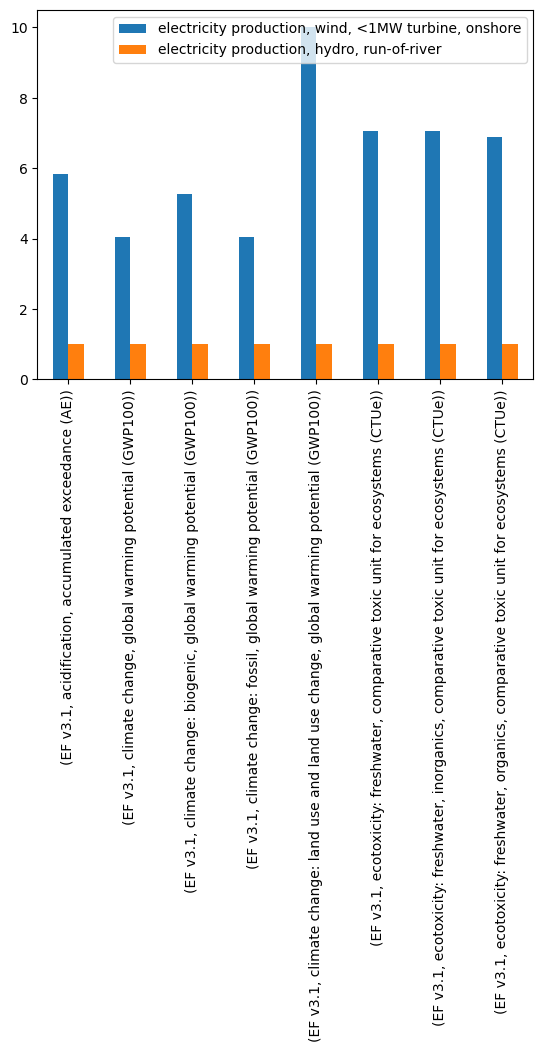

In [188]:
df.div(df.iloc[:, -1], 0).plot(kind="bar")

You can also create "fuller" DataFrames. Here is with code from [here](http://stackoverflow.com/questions/42984831/create-a-dataframe-from-multilca-results-in-brightway2): 

In [189]:
scores = pd.DataFrame(myMultiLCA.results, columns=myMultiLCA.methods)
as_activities = [
    (bw.get_activity(key), amount) 
    for dct in myMultiLCA.func_units 
    for key, amount in dct.items()
]
nicer_fu = pd.DataFrame(
    [
        (x['database'], x['code'], x['name'], x['location'], x['unit'], y) 
        for x, y in as_activities
    ], 
    columns=('Database', 'Code', 'Name', 'Location', 'Unit', 'Amount')
)
pd.concat([nicer_fu, scores], axis=1).T

,0,1
Database,ecoinvent 3.9.1 cutoff,ecoinvent 3.9.1 cutoff
Code,2b0ebf51700ba8f7806d954dfe9c6e88,26d969deb5a11f75bcc501eac33cac48
Name,"electricity production, wind, <1MW turbine, on...","electricity production, hydro, run-of-river"
Location,IR,CH
Unit,kilowatt hour,kilowatt hour
Amount,1,1
"(EF v3.1, acidification, accumulated exceedance (AE))",0.000091,0.000016
"(EF v3.1, climate change, global warming potential (GWP100))",0.014585,0.00361
"(EF v3.1, climate change: biogenic, global warming potential (GWP100))",0.000019,0.000004
"(EF v3.1, climate change: fossil, global warming potential (GWP100))",0.014554,0.003605


## Uncertainty

Values of exchanges in datasets may come with uncertainty.
See [documentation](https://stats-arrays.readthedocs.io/en/latest/) of `stats_array`.

Let's find out how uncertainty is defined in ecoinvent:

In [195]:
act = bw.Database("ecoinvent 3.9.1 cutoff").random()
for e in act.exchanges():
    if e["type"] == "technosphere":
        pprint(e.as_dict())
        print(e.uncertainty_type)
        print(e.uncertainty)
        break

{'activity': '89aac91d-10df-5ca4-8625-b723a68432e1',
 'amount': 1.5,
 'classifications': {'CPC': ['41431: Unwrought aluminium']},
 'comment': 'EcoSpold01Location=RER\nEstimation:5% of aluminium parts replaced',
 'flow': 'e77d9460-e423-4e88-8c44-d1a4545b0b07',
 'input': ('ecoinvent 3.9.1 cutoff', 'f3128ab8a7df03c2c38e306c2967cd92'),
 'loc': 0.4054651081081644,
 'name': 'aluminium alloy, AlMg3',
 'output': ('ecoinvent 3.9.1 cutoff', '872a0d9422aff8d44786042ba3df4a37'),
 'pedigree': {'completeness': 2,
              'further technological correlation': 3,
              'geographical correlation': 5,
              'reliability': 2,
              'temporal correlation': 5},
 'production volume': 0.0,
 'properties': {'carbon allocation': {'amount': 0.0, 'unit': 'kg'},
                'carbon content': {'amount': 0.0, 'unit': 'dimensionless'},
                'carbon content, fossil': {'amount': 0.0,
                                           'comment': 'AlMg3',
                              

### Running a stochastic analysis (Monte Carlo)

In [199]:
iterations = 100
results = np.zeros((2, iterations))

In [200]:
FU_multi = [{wind.key:1}, {hydro.key:1}]

In [202]:
mc = bw.MonteCarloLCA(
    FU_multi[0],
    ipcc_2021_method.name,
    #seed=1,
    #presamples=[stochastic_filepath]
)

for i in range(iterations):
    print(i)
    next(mc)
    for j, fu in enumerate(FU_multi):
        mc.redo_lcia(fu)
        results[j, i] = mc.score

0


/opt/homebrew/Caskroom/miniforge/base/envs/bw/lib/python3.11/site-packages/scikits/umfpack/umfpack.py:736: UmfpackWarning: (almost) singular matrix! (estimated cond. number: 7.50e+13)
  warnings.warn(msg, UmfpackWarning)


1


/opt/homebrew/Caskroom/miniforge/base/envs/bw/lib/python3.11/site-packages/scikits/umfpack/umfpack.py:736: UmfpackWarning: (almost) singular matrix! (estimated cond. number: 1.46e+13)
  warnings.warn(msg, UmfpackWarning)


2


/opt/homebrew/Caskroom/miniforge/base/envs/bw/lib/python3.11/site-packages/scikits/umfpack/umfpack.py:736: UmfpackWarning: (almost) singular matrix! (estimated cond. number: 1.60e+13)
  warnings.warn(msg, UmfpackWarning)


3


/opt/homebrew/Caskroom/miniforge/base/envs/bw/lib/python3.11/site-packages/scikits/umfpack/umfpack.py:736: UmfpackWarning: (almost) singular matrix! (estimated cond. number: 5.77e+13)
  warnings.warn(msg, UmfpackWarning)


4


/opt/homebrew/Caskroom/miniforge/base/envs/bw/lib/python3.11/site-packages/scikits/umfpack/umfpack.py:736: UmfpackWarning: (almost) singular matrix! (estimated cond. number: 3.71e+13)
  warnings.warn(msg, UmfpackWarning)


5


/opt/homebrew/Caskroom/miniforge/base/envs/bw/lib/python3.11/site-packages/scikits/umfpack/umfpack.py:736: UmfpackWarning: (almost) singular matrix! (estimated cond. number: 3.98e+13)
  warnings.warn(msg, UmfpackWarning)


6


/opt/homebrew/Caskroom/miniforge/base/envs/bw/lib/python3.11/site-packages/scikits/umfpack/umfpack.py:736: UmfpackWarning: (almost) singular matrix! (estimated cond. number: 1.25e+14)
  warnings.warn(msg, UmfpackWarning)


7


/opt/homebrew/Caskroom/miniforge/base/envs/bw/lib/python3.11/site-packages/scikits/umfpack/umfpack.py:736: UmfpackWarning: (almost) singular matrix! (estimated cond. number: 1.46e+14)
  warnings.warn(msg, UmfpackWarning)


8
9


/opt/homebrew/Caskroom/miniforge/base/envs/bw/lib/python3.11/site-packages/scikits/umfpack/umfpack.py:736: UmfpackWarning: (almost) singular matrix! (estimated cond. number: 1.18e+13)
  warnings.warn(msg, UmfpackWarning)


10
11


/opt/homebrew/Caskroom/miniforge/base/envs/bw/lib/python3.11/site-packages/scikits/umfpack/umfpack.py:736: UmfpackWarning: (almost) singular matrix! (estimated cond. number: 2.13e+13)
  warnings.warn(msg, UmfpackWarning)


12
13
14


/opt/homebrew/Caskroom/miniforge/base/envs/bw/lib/python3.11/site-packages/scikits/umfpack/umfpack.py:736: UmfpackWarning: (almost) singular matrix! (estimated cond. number: 1.89e+13)
  warnings.warn(msg, UmfpackWarning)


15


/opt/homebrew/Caskroom/miniforge/base/envs/bw/lib/python3.11/site-packages/scikits/umfpack/umfpack.py:736: UmfpackWarning: (almost) singular matrix! (estimated cond. number: 5.37e+13)
  warnings.warn(msg, UmfpackWarning)


16
17


/opt/homebrew/Caskroom/miniforge/base/envs/bw/lib/python3.11/site-packages/scikits/umfpack/umfpack.py:736: UmfpackWarning: (almost) singular matrix! (estimated cond. number: 6.29e+13)
  warnings.warn(msg, UmfpackWarning)


18


/opt/homebrew/Caskroom/miniforge/base/envs/bw/lib/python3.11/site-packages/scikits/umfpack/umfpack.py:736: UmfpackWarning: (almost) singular matrix! (estimated cond. number: 4.07e+13)
  warnings.warn(msg, UmfpackWarning)


19
20


KeyboardInterrupt: 

Let's visualize the results:

In [207]:
df = pd.DataFrame(results.T, columns=["Wind", "Hydro"])
df

,Wind,Hydro
0,0.014540,0.006751
1,0.015230,0.004918
2,0.044646,0.006851
3,0.017049,0.002987
4,0.014708,0.004179
...,...,...
95,0.000000,0.000000
96,0.000000,0.000000
97,0.000000,0.000000
98,0.000000,0.000000


<Axes: >

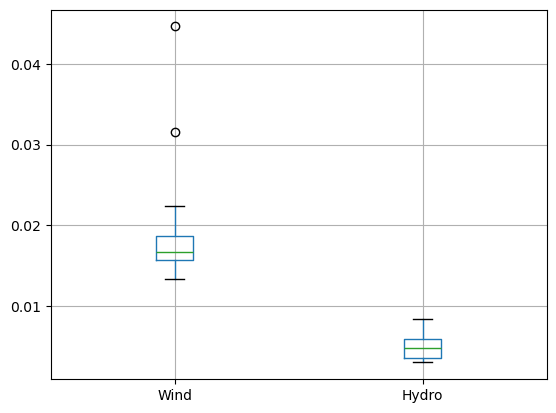

In [209]:
df[df.sum(axis=1)>0].boxplot()

## Let's now look at the import and export of data

Open the second notebook.

In [211]:
ipcc_2021_method.name

('IPCC 2021', 'climate change', 'global warming potential (GWP100)')